# Linear Regression in Python
### Fitting Polynomial Functions to Data

### Introduction 
When looking at the results of experiments, it is critically important to be able to fit curves to scattered data points. We will demonstrate that doing so in python is relatively simple, but the theory behind how it works is a bit more involved. 

There are different ways of fitting curves to scattered points. One of the most frequently used is known as Linear Least Squares, a subset of Bayesian generalized fitting. Note, we can fit any order polynomial, not just straight lines, using this method. The “linear” part refers to how the distance between the data point and the line is measured, as we describe momentarily. The method of LLS fits a line to your data that minimizes the squared distances between all the points and the line. The reason for choosing the squared distances is that some points will lie below your line, but distances are positive. By squaring we allow for points below the line to also be a “positive” distance away from the line. The formula for generating a LLS fit outputs the constants of the equation ($a_0+a_1x+a_2x^2 +$...) for as many orders as you require based on the degree/order of your fit. For the linear case, then, LLS outputs a slope and a y-intercept. The formula requires linear algebra, which some of you may not yet have taken, and looks like this:

\begin{equation} \quad \begin{pmatrix} N & \sum x_i & \sum x_{i}^2 & \cdots & \sum x_{i}^m\\ \sum x_{i} & \sum x_{i}^2 & \sum x_{i}^3 & \cdots & x_{i}^{m+1}\\ \vdots & \vdots & \vdots & \ddots & \vdots\\ \sum x_{i}^m & \sum x_{i}^{m+1} & \sum x_{i}^{m+2} & \cdots & \sum x_{i}^{2m} \end{pmatrix} \begin{pmatrix} c_1 \\ c_2 \\ c_3 \\  \vdots \\ c_n\end{pmatrix}=\begin{pmatrix} \sum y_i \\ \sum x_i y_i \\ \vdots \\ \sum x^{n-1}y_i\end{pmatrix}\end{equation}

This may look a little scary, but its not hard to implement. $N$ is the number of data points you are trying to fit to. To enter the $x$ sums, simply take your x array (such as an array of centroids), and run np.sum on them (squared, cubed, etc as required). The $y_i$ are the
$y$ values of the data points, which can be multiplied by the $x$ arrays within the np.sum function.

### Fitting a Straight Line to Data

Equation 1 shows us how to fit any order polynomial to a set of data (based on how large you make the array). We are going to practice simply fitting an order 1 polynomial (a straight line) to some data. In this case, the LLS formula simplifies to:

\begin{equation}
\quad
\begin{pmatrix} 
N & \sum x_i \\
\sum x_i & \sum x_{i}^2
\end{pmatrix}
\begin{pmatrix}
c_1 \\
c_2 \\
\end{pmatrix}=
\begin{pmatrix}
\sum y_i \\
\sum x_i y_i
\end{pmatrix}
\end{equation}

where we are solving for $c_1$ and $c_2$, the slope and intercept of our best fit. We know N (it's just the number of data points), we know the $x_i$ and $y_i$, so now it's just a matter of figuring out how to do matrix multiplication in python. If we remember our linear algebra, to get the $c_1, c_2$ on it's own, we need to multiply both sides *on the left* by the *inverse* of the (N...) array. So we arrive at:

\begin{equation}
\quad
\begin{pmatrix}
c_1 \\
c_2 \\
\end{pmatrix}=
\begin{pmatrix} 
N & \sum x_i \\
\sum x_i & \sum x_{i}^2
\end{pmatrix}^{-1}
\begin{pmatrix}
\sum y_i \\
\sum x_i y_i
\end{pmatrix}
\end{equation}

where the inverse of the (N...) matrix is now being dotted into the ($\sum y_i$...) array. The functions you'll find useful when setting this up:
- np.linalg.inv(arr)
- np.dot(arr1, arr2)

Remember that to set up multidimensional arrays, the format is np.array( [ [a,b,c,...] , [d,e,f,g,...],...])
that is, lists nested inside a list nested inside the function call. 

### Linear algebra practice

Before we dive into the exciting world of fitting lines, let's practice doing some linear algebra in python. For this exercise, we'll be taking a system of equations, converting it to a matrix equation, and then finding the solution with python.

Consider the following system of equations
$$3x + 7y = 14$$
$$8x + 9y = 12$$
In principle, we could just solve this system by hand by eliminating or substituting for one of the variables. Since this is a coding workshop, let's make our lives a little ~~easier~~harder by doing this with some code!

First, convert the system to a matrix equation like we did at the start of today's session. Initialize the components of the matrix equation in code using numpy arrays in the block below.

In [1]:
import numpy as np
 
# fill in with new variables representing the components of matrix eqn

Now solve the system using the numpy linear algebra methods mentioned above.

In [ ]:
# solve matrix equation with linear algebra


In [3]:
# fill this with the x and y values of your solution
x_soln = 
y_soln = 

Let's check our work. We can do this two ways: first, try and solve the system by hand and see if you get the same solution for $x$ and $y$ that your code found. Next, plot the two lines and see where they intersect. Does this match the solution you found?

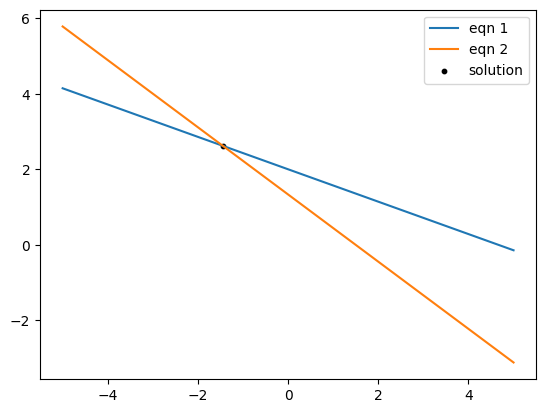

In [4]:
import matplotlib.pyplot as plt

plt.plot(____, ____, label = 'eqn 1')
plt.plot(____, ____, label = 'eqn 2')
plt.scatter(x_soln, y_soln, s = 10, color = 'k', label = 'solution')
plt.legend()
plt.show()

### Using real data

Okay, now we're in good shape to try and apply this to some real data. You should have a file called `calibration.txt`, which contains the data we are going to be fitting. You can load it into python using the np.loadtxt function. You'll want to end up with an array of centroid values (first column) and an array of real wavelength values (second column). Once you've done that, you can use the given code to generate a plot to see what data we are fitting.

Text(0.5, 1.0, 'calibration data')

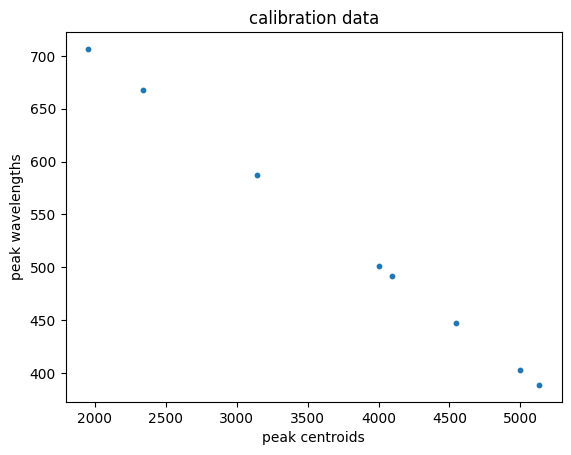

In [10]:
# load data and plot

plt.xlabel('peak centroids')
plt.ylabel('peak wavelengths')
plt.title('calibration data')

Let's define a function called linear_fit that implements the equations given above and returns two values: the slope $m$ and the y-intercept. 

In [8]:
def linear_fit(x_data, y_data):
    #fill in code here
    
    return slope, intercept

In [ ]:
# print the coefficients:


Great! So now we have the y-intercept and slope of our "best fit" to the data. From a scientific perspective, we are basically done - it's almost always the values of the slope and intercept that are of interest to us when fitting. But just to see what we've accomplished, let's plot the best fit line over our data:

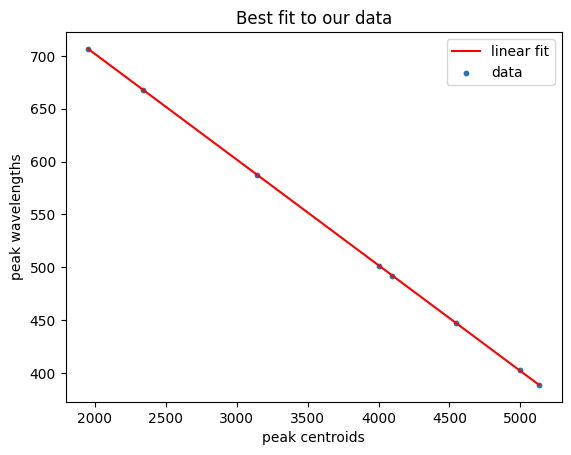

In [13]:
def plot_fit(x,y):
    slope, intercept = linear_fit(x,y)
    fit_line = slope*x + intercept
    plt.plot(x,fit_line,'r', label='linear fit')
    plt.scatter(x,y, s = 10, label='data')
    plt.legend()
    plt.xlabel('peak centroids')
    plt.ylabel('peak wavelengths')
    plt.title('Best fit to our data')
    plt.show()
    
plot_fit(centroids, wavelengths)

### Evaluating the Fit
So we have a fit to our data. Is it a good fit? Visually, it seems so. But we can be a little bit more quantitative. 

To do so, we are going to evaluate the **residuals,** that is, the *difference* between the prediction of our fit and our data itself. Given that our data has no uncertainty (at least, none that has been specified), this is easy to calculate. Fill in the residual function below to simply return the difference between the fit and the data, along with a single quantity that is the sum of those residuals. As an arbitrary convention, subtract the fit from the data, instead of the converse.

In [18]:
def return_residuals(x,y):
    #Code goes here
    
    return residuals, sum_residuals

In [ ]:
residuals, sum_residuals = return_residuals(centroids, wavelengths)
print(sum_residuals)

If we take a look at the sum of the residuals, we notice it's an absurdly small value, something like 7e-12. This means that though the spread in residuals might be large, on average, the fit overpredicts the data and underpredicts the data in equal amounts, which is a sign of a good fit.

### Higher Order Polynomial Fits

Alright, so we have successfully fit a straight line (polynomial order 1) to our data. But what if the data were better described by a quadratic? It may look linear when we plot it, but it might be that the "section" of the data we have access to represents a small one, and we can't see the overall curvature well. 

We can fit any order of polynomial to our data (being careful to avoid over-fitting - remember, a high enough order polynomial can fit *any* set of data with 0 residual, but will look pretty wacky). But, instead of going through the pain of constructing a 3x3 array in the way we did above, let's go ahead and utilize the handy function created for the purpose in the Numpy module - since we now know how it works. 

In [ ]:
def quadratic_fit(x,y):
    fit_coefficients = np.polyfit(x,y,2)
    a0, a1, a2 = fit_coefficients[0], fit_coefficients[1], fit_coefficients[2]
    return a0, a1, a2

def plot_quadratic_fit(x,y):
    #Code goes here: look at above if you're not sure!
    
plot_quadratic_fit(centroids, wavelengths)

This looks like it could be a decent fit as well, though it doesn't look as good as the linear fit. In fact, if you print them out, you'll see that Polyfit is telling us that it thinks that *if* this data is quadratic, the quadratic coefficient is very small; the remaining linear and constant coefficients are very similar to those in our linear fits. Let's take a look at the residuals:

In [ ]:
def quadratic_residuals(x,y):
    #Code Here: Similar to above!
    

q_residuals, q_residual_sum = quadratic_residuals(centroids, wavelengths)
print(q_residual_sum)

This is still small, but if we print out the coefficient of the quadratic term, we see that it is almost 0. So it would appear that the linear fit is better here, e.g., the data most likely *are* linear in nature. 

As a note though, that means situations like this, where one order of fit is demonstrably and majorly better than another, rarely actually happens. Even when *nature* chooses a truly, fundamentally linear relation between two measurable variables, we can almost never obtain measurements of that relation so perfectly distributed around the true values so as to find that the linear (or any other order) fit is the best. In reality, we tend to simply try to use the lowest order fit that adequately describes our data. 

This isn't too difficult - if you, for example, plot the residuals for each data point for both the linear and quadratic fits, you'll find they look similar in form. Typically, if the data truly were quadratic, the linear residuals would have a strong functional form to them (an under, then over, then under fit). (Do it below if you're curious!) 

Fitting data is a **huge** aspect of data analysis, and this tutorial barely scratches the surface. How do we fit if we have differing uncertainties on our data points? What if both the $x$ and $y$ measurements have associated uncertainties? (Hint: this gets very complicated). What if we are fitting in multidimensional parameter spaces? How do we fit curves that are functional in nature, but not polynomials (like Gaussians, exponentials, compositions of other functions, etc.)?